In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

TRAIN_DIR = "../data/processed/train"
VAL_DIR = "../data/processed/val"
TEST_DIR = "../data/processed/test"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            
    rotation_range=20,          
    zoom_range=0.2,            
    horizontal_flip=True,       
    brightness_range=[0.8, 1.2] 
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
test_gen = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 10166 images belonging to 10 classes.
Found 2175 images belonging to 10 classes.
Found 2188 images belonging to 10 classes.


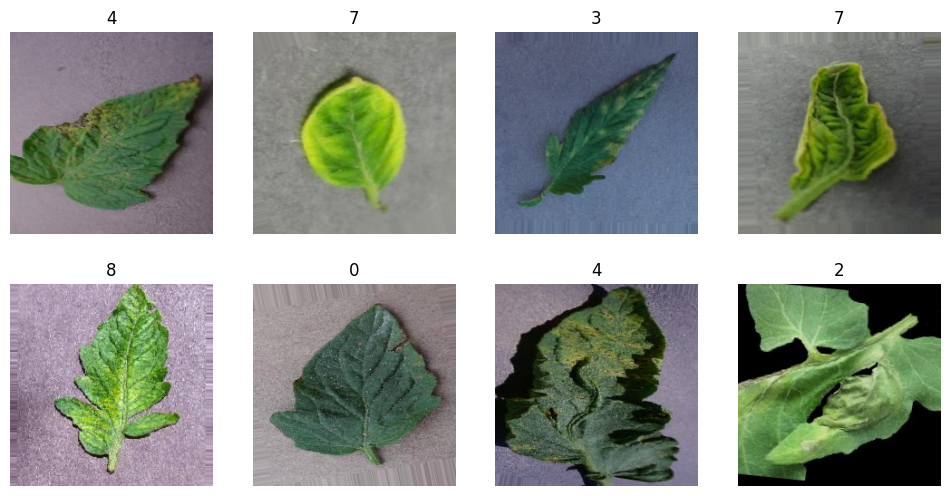

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_batch, y_batch = next(train_gen)

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.show()

In [9]:
class_indices = train_gen.class_indices
print("Class mapping:", class_indices)

Class mapping: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
